Mining Social and Geographic Datasets
-----------------------------------

GEOG0115 Computer Lab Week 7 
-------------------------------

Note: Notebook might contain scripts and instructions adapted from GEOG0115, GEOG0051. 
Contributors: Stephen Law, Michal Iliev, Mateo Neira, Nikki Tanu, Thomas Keel, Gong Jie, Jason Tang and Demin Hu.

Overview of Content in this Jupyter Notebook
===============
> ### Lab Notebook 7.1: Machine Learning for travel mode prediction (tabular data)
> ### Lab Exercise 7.1: XGBoost (Gradient Boosting)

Lab Notebook 7.1: Machine Learning for travel mode prediction (tabular data)
-------------------------------

In this week's notebook, we will be reviewing some of the concepts and algorithms we learnt in previous three classes such as <b>logistic regression</b>, <b>decision tree</b>, <b>Random Forest</b> and <b>Gradient Boosting</b> for the travel mode classification problem. Think of this as a **review notebook** to put some of what you learn into practice.

## Machine Learning Application: Travel mode classification

An important task in urban analytics and transport planning is to predict the travel mode choice of individuals. The aim of the task is to predict which travel mode an individual takes namely `[car,bike,walk]`. This type of research can be conducted using  `trajectory` data but also travel survey data that is based on various socio-economic, climatic, individual and neighbourhood attributes such as `['distance', 'density', 'age', 'male', 'ethnicity','education', 'income', 'cars', 'license', 'bicycles', 'weekend','diversity', 'green', 'temp', 'precip', 'wind']`. 

The primary data source for this study is the Dutch national travel survey (NTS) conducted from 2010 to 2012 based on individual travel diaries. The survey participants were asked to record every trip in six days randomly selected over a year to capture seasonal effects. Below is the description of the input variables. Please read **(Hagenauera et al. 2017)** as part of this lab seminar. 

**Trip**	<br>
`distance`	Total trip distance in km <br>
`weekend`	Trip is done at the weekend <br>
`mode`	Main travel mode (walk, bike, pt, car). pt refers to public transport. <br>
**Individual**	<br>
`age`	Age of participant in years <br>
`education`	Education of participant (lower, middle, higher)<br>
`ethnicity`	Ethnicity of participant (native, western, other)<br>
`license`	Participant owns a driver’s license (yes, no)<br>
`male`	Male participant (yes, no)<br>
**Household**	<br>
`bicycles`	Number of bicycles per household<br>
`cars`	Number of cars per household<br>
`income`	Net annual household income in 1,000€ (<20,≥ 20–40,≥ 40)<br>
**Build and natural environment**	<br>
`density`	Address density, aggregated over post codes, in 1,000addresses per km2<br>
`diversity`	Shannon diversity index of land use classes<br>
`green`	Proportion of green space per post code area in %<br>
**Weather**	<br>
`precip`	Daily precipitation sum in mm<br>
`temp`	Daily maximum temperature in °C<br>
`wind`	Daily average wind speed in m/s<br>



[1] Hagenauera,J., Helbich,M. (2017) Comparative study of machine learning classifiers for modelling travel mode choice. Expert Systems with Applications (78)

#### Import Scikit-learn
You may notice below that we import only certain portions of the ```sklearn``` package, and this is so as to conserve memory on your operating system through importing just what we will use. Remember also that what we are introduced to in these notebooks are but a drop in the ocean of possibilities of how you could implement Machine Learning principles with Python, and so, as your interests guide you, feel free to explore content and functions beyond what is set out here and in addition to some the links for further reading placed in these notebooks.

For more infomation, look at [the official website](https://scikit-learn.org/).

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 7.1.1 Supervised Learning - Logistic Regression

### Logistic Regression (Baseline Model)

Let's start with running a logistic regression as the baseline classifier. As a reminder, a <b>Logistic Regression model</b> is a variant of a generalised linear models where a <b>sigmoid</b>  function $s(x)=\frac{1}{1+e^{-f(x)}}$ is typically used in translating a standard linear regression into a binary classification problem $y_i\in{0,1}$ which can be extended into a multi-class classification problem $y_i\in{1,...,k}$. While linear regression models predict an output that is a continuous variable, logistic regression models are instead used for classification with a discrete categorical outcome (E.g. whether the flower is an Iris or rather an individual takes a bus to school). These models predict the <b> probability</b> of a certain event or categorisation happening: based on the variables defined by the user, each observation will be given a probability of between 0 and 1 on the output (event/class) in happening. Thereafter, the observations can be classified into 2 or more classes based on user-defined thresholds. 

Note: The logistic regression function in ```sklearn``` implements regularized logistic regression to give a predicted output of 2 or more classes. Read more about it [here](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) and [here](https://mlu-explain.github.io/logistic-regression/).

In [37]:
# let's read in the national travel survey data
dft=pd.read_csv('C://Users//jihun//Desktop//SGDS//GEOG0115 - Introduction to Social Data Science//Week 7//practical//Travel_Mode_Classification//nts_data.csv')

In [38]:
dft.head(20)

,mode_main,distance,density,age,male,ethnicity,education,income,cars,license,bicycles,weekend,diversity,green,temp,precip,wind
0,walk,1.0,1.26259,84,no,native,lower,less20,0,yes,1,yes,1.24604,26.881233,0.1,0.10,3.0
1,walk,10.0,1.26259,84,no,native,lower,less20,0,yes,1,yes,1.24604,26.881233,0.1,0.10,3.0
2,car,3.0,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8
3,car,3.0,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8
4,car,61.5,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8
5,car,61.5,0.88025,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8
6,walk,0.5,1.83997,47,yes,native,lower,less20,0,yes,3,yes,1.72325,36.698977,-2.2,0.05,2.5
7,walk,0.5,2.15367,47,yes,native,lower,less20,0,yes,3,yes,1.72325,36.698977,-2.2,0.05,2.5
8,walk,0.4,1.18075,31,yes,native,middle,20to40,1,yes,2,yes,1.33844,82.758365,-1.0,0.00,2.5
9,car,5.0,2.17375,65,no,native,lower,less20,1,yes,2,yes,1.36730,33.290612,0.2,2.20,1.8


In [39]:
Xcols=['distance', 'density', 'age', 'male', 'ethnicity',
       'education', 'income', 'cars', 'license', 'bicycles', 'weekend',
       'diversity', 'green', 'temp', 'precip', 'wind']
ycols=['mode_main']


In [40]:
#define the x-variables (input) and y-variable (outcome of classification)
X = dft[Xcols]
y = dft[ycols]

In [41]:
X.head()

,distance,density,age,male,ethnicity,education,income,cars,license,bicycles,weekend,diversity,green,temp,precip,wind
0,1.0,1.26259,84,no,native,lower,less20,0,yes,1,yes,1.24604,26.881233,0.1,0.10,3.0
1,10.0,1.26259,84,no,native,lower,less20,0,yes,1,yes,1.24604,26.881233,0.1,0.10,3.0
2,3.0,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8
3,3.0,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8
4,61.5,1.76264,27,yes,western,middle,20to40,1,yes,2,yes,1.53959,36.045955,-3.4,0.05,1.8


In [42]:
y.head()

,mode_main
0,walk
1,walk
2,car
3,car
4,car


let's first look at the dependent variable (categorical) of interests using a barplot.

<Axes: ylabel='mode_main'>

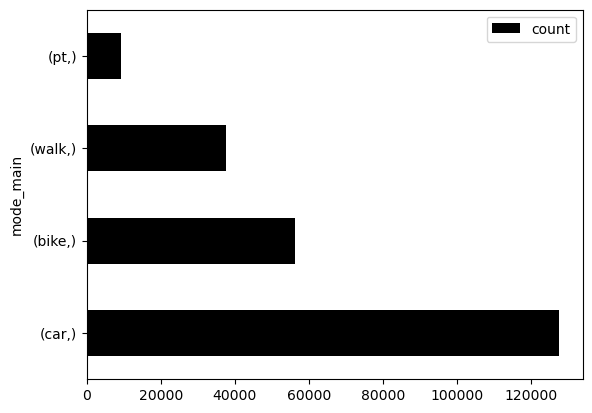

In [43]:
pd.DataFrame(y.value_counts()).plot(kind='barh',color='black')

#### 🤨 TASK
what do you notice? are the different classes balance? and which is the most popular mode of transport and which is the less?

In [44]:
# cars are the most popular mode of transport and public transport the least

let's now take a look at the independent variables which has a total of 230,607 samples, there seems to be both numeric and categorical variables in the dataframe.

In [45]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230608 entries, 0 to 230607
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   distance   230608 non-null  float64
 1   density    230608 non-null  float64
 2   age        230608 non-null  int64  
 3   male       230608 non-null  object 
 4   ethnicity  230608 non-null  object 
 5   education  230608 non-null  object 
 6   income     230608 non-null  object 
 7   cars       230608 non-null  int64  
 8   license    230608 non-null  object 
 9   bicycles   230608 non-null  int64  
 10  weekend    230608 non-null  object 
 11  diversity  230608 non-null  float64
 12  green      230608 non-null  float64
 13  temp       230608 non-null  float64
 14  precip     230608 non-null  float64
 15  wind       230608 non-null  float64
dtypes: float64(7), int64(3), object(6)
memory usage: 28.2+ MB


## Describing the dataset
 
Before building a classifier, it is important to **understand** and **describe** the data contained within the imported data frames. For example, how is the data distributed? Are there any missing values?

For numeric variables
* descriptive statistics
* histograms

For categorical variables
* bar-plot
* counts

Beyond that, depending on your application, it is also common to look at how the variables correlate with each other using a correlation matrix.

let's check whether there are any missing data first.

In [46]:
missing_count = X.isna().sum()
print("Count of missing values")
print(missing_count)

Count of missing values
distance     0
density      0
age          0
male         0
ethnicity    0
education    0
income       0
cars         0
license      0
bicycles     0
weekend      0
diversity    0
green        0
temp         0
precip       0
wind         0
dtype: int64


let's then describe the data statistically. What was the mean/median `temp` and `percip` for example in the dataset? 


In [47]:
X.describe()

,distance,density,age,cars,bicycles,diversity,green,temp,precip,wind
count,230608.000000,230608.000000,230608.000000,230608.000000,230608.000000,230608.000000,230608.000000,230608.000000,230608.000000,230608.000000
mean,12.217913,1.569055,47.661356,1.382584,3.357134,1.774927,54.939470,13.316930,2.184633,4.097702
std,23.545686,1.593292,15.934884,0.822056,1.936614,0.493037,22.172372,7.565732,4.674801,1.914821
min,0.100000,0.001840,18.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.400000
25%,1.500000,0.591320,36.000000,1.000000,2.000000,1.388940,37.111200,8.000000,0.000000,2.700000
50%,4.000000,1.153210,47.000000,1.000000,3.000000,1.827390,54.102123,13.400000,0.100000,3.800000
75%,12.000000,1.952960,60.000000,2.000000,4.000000,2.172380,74.381844,19.000000,2.300000,5.100000
max,400.000000,11.442960,98.000000,10.000000,10.000000,2.827560,97.813002,35.900000,142.300000,16.300000


For **numeric variables**, you can visualise the distribution of the data using histograms.

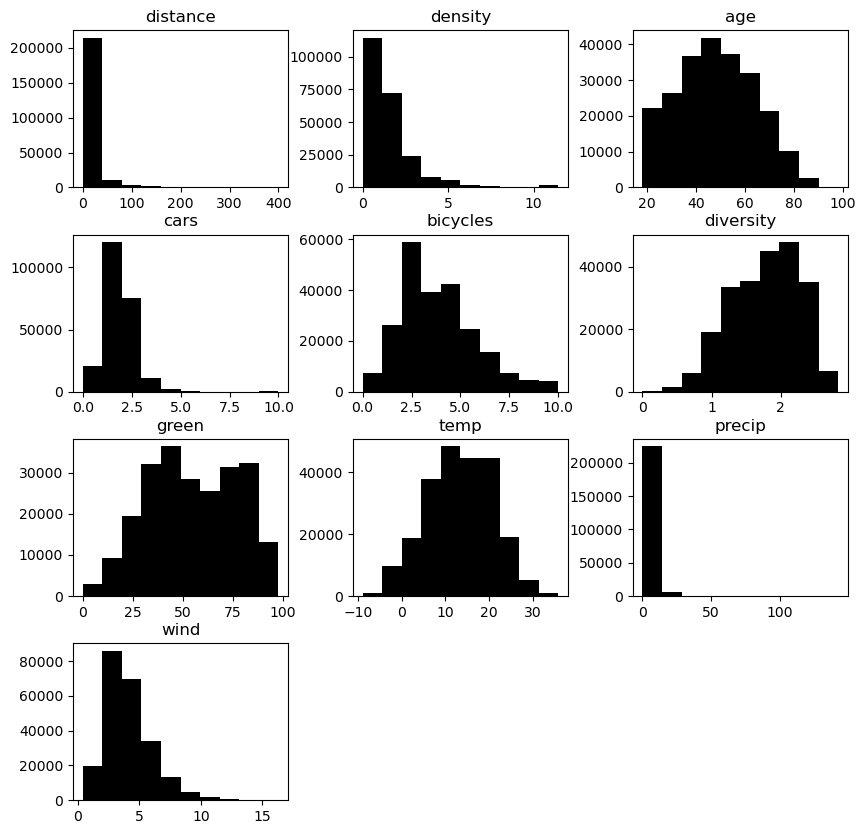

In [48]:
numeric_data=X.select_dtypes(include=[np.number])
numeric_data.hist(figsize=(10,10),color='black',grid=False)
plt.axis(False)
plt.show()

you might notice most of the variables distributions are uni-modal, some are symmetrical while a couple are highly skewed. Do the distribution makes sense? Based on our previous learning, `distance` (distance travel) is highly skewed meaning the majority of the trips are shorter in distance. 


let's then describe the categorical variable using barplots which counts the frequency for each class.

In [49]:
categorical_data = X.select_dtypes(include=[object])
categorical_data.columns

Index(['male', 'ethnicity', 'education', 'income', 'license', 'weekend'], dtype='object')

In [50]:
categorical_data['ethnicity'].value_counts()

ethnicity
native        201561
western        17772
nonwestern     11275
Name: count, dtype: int64

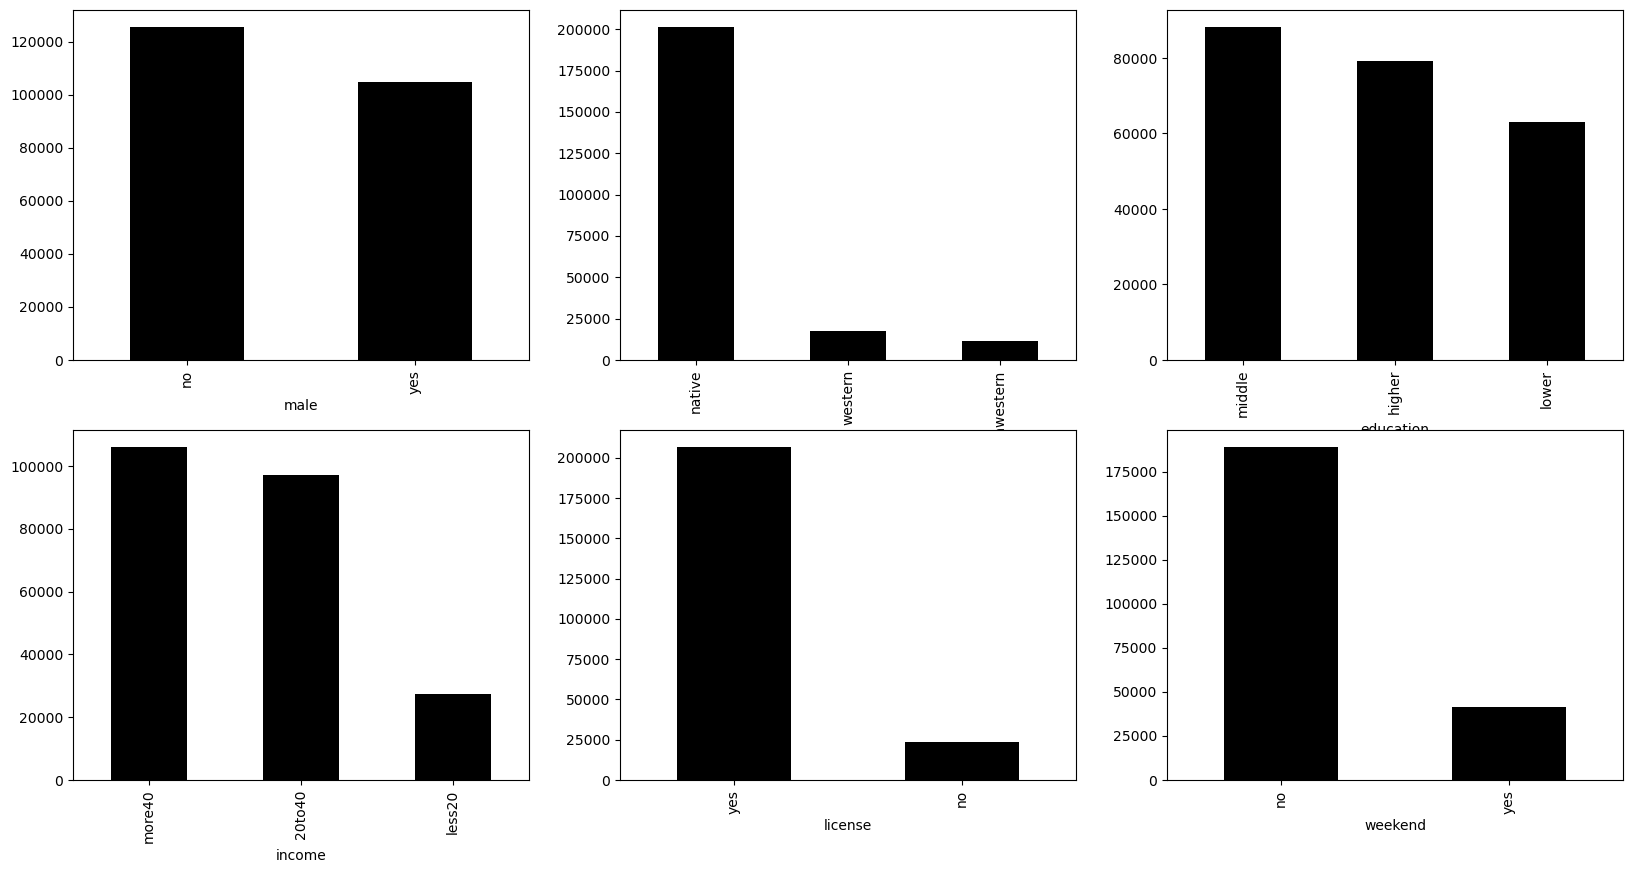

In [51]:
fig,ax=plt.subplots(2,3,figsize=(20,10))
categorical_data['male'].value_counts().plot(kind='bar',color='black',ax=ax[0,0])
categorical_data['ethnicity'].value_counts().plot(kind='bar',color='black',ax=ax[0,1])
categorical_data['education'].value_counts().plot(kind='bar',color='black',ax=ax[0,2])
categorical_data['income'].value_counts().plot(kind='bar',color='black',ax=ax[1,0])
categorical_data['license'].value_counts().plot(kind='bar',color='black',ax=ax[1,1])
categorical_data['weekend'].value_counts().plot(kind='bar',color='black',ax=ax[1,2])
plt.show()

you might notice `male`,`education`,`income` has a more balanced class than `ethnicity`,`license` and `weekend`

# Data preparation
Before we can use the data in our model we always need to transform it, process it, standardise it, clean it, etc. 

As a reminder, a couple of common data preparation procedures including;
1. coding categorical variables into numeric variables
2. transforming the numerous variables to be more symmetrically distributed (it is not an assumption of machine learning models but in practice it often helps in training)
3. standardise the numerous variables to make the features more comparable and to improve stability in training.

Please read more [here](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling)



Let's now transform the highly skewed numeric variables so that it is less skewed. This is not a necessary assumption for most machine learning algorithm but it helps in practice. It also reduces the influence of the extreme values. 

In [52]:
from scipy.stats import skew

# you can calculate the skewness of the variable by using skew function in scipy.stats
numeric_data=X.select_dtypes(include=[np.number])

skewed = X[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))

# these are all the variables that are very positively skewed. 
rskewed = skewed[(skewed > 1)].index

# these are all the variables that are very negatively skewed. 
lskewed = skewed[(skewed < -1)].index
print (f'leftskewed:{lskewed} and right-skewed:{rskewed}')

leftskewed:Index([], dtype='object') and right-skewed:Index(['distance', 'density', 'cars', 'precip', 'wind'], dtype='object')


You will see a number of variables are highly right-skewed so let's transform these ones specifically. For right-skewed variables, log-transform the variable `X[rskewed] = np.log1p(X[rskewed])`. If there were any left-skewed variables, you would log transform the reflected skewed variable `X[lskewed] = np.log1p(np.max(X[lskewed])-X[lskewed])`. 

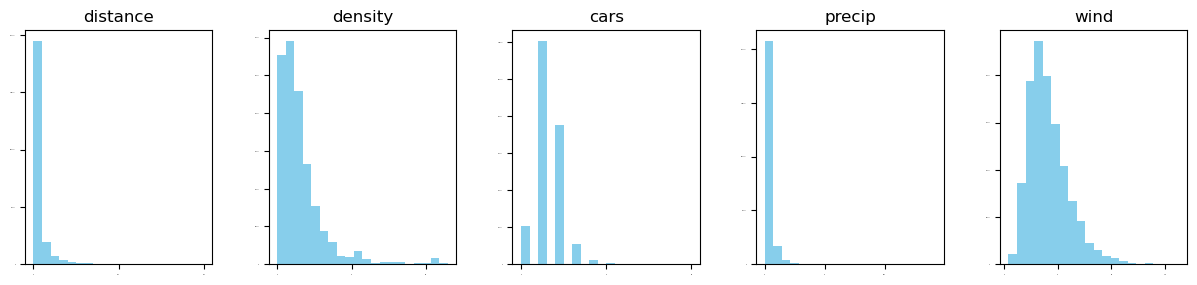

C:\Users\jihun\AppData\Local\Temp\ipykernel_27920\2709902784.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[rskewed] = np.log1p(X[rskewed])


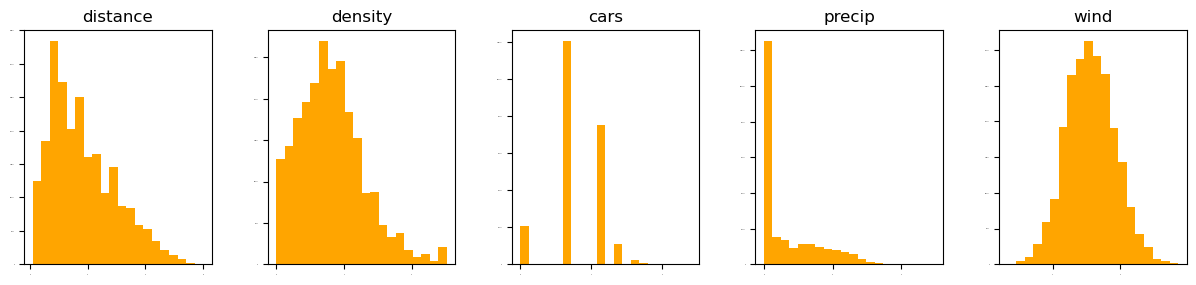

In [53]:
# before transformation plot
X[rskewed].hist(bins=20,figsize=(15,7), color='skyblue', xlabelsize=0, ylabelsize=0, grid=False, layout=(2,5))
plt.show()

# log-transforms the right skewed reflected variables of the dataset 
X[rskewed] = np.log1p(X[rskewed])

# now plot again the variables after their log transformation
X[rskewed].hist(bins=20,figsize=(15,7), color='orange', xlabelsize=0, ylabelsize=0, grid=False, layout=(2,5))
plt.show()

### reminder note on transformation

What do you notice different pre- and post-transformation for the variables above? For which variables does the log-transformation seem to make it less skewed?  

It is important to note, data transformations is common to make skewed variable less skewed but it must be applied very cautiously and it isn't a necessary condition for running regression models and you loses interpretability for the specific feature. It's crucial to examine the distribution of your data and consider the context of your analysis before deciding whether to log transform the numeric variables. Additionally, if you do choose to log transform, ensure that you handle zero values appropriately (e.g., by adding a small constant before transformation if zero values are present).

Be sure to play around with the many different arguments that allow you to customise the look of your multi-grid histogram plots with the `.hist()` (and all the other functions you come to interface with). 

Other more advance forms of transforms (`power transform`) are detailed [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.power_transform.html).

### Correlations/Covariance between variables

We can use a correlation matrix to understand the association between variables. Variables are almost always correlated. Ideally, we want our input variables to not be totally correlated with one another. Significant correlation between our independent variables undermines the robustness of our model and interpretability.  

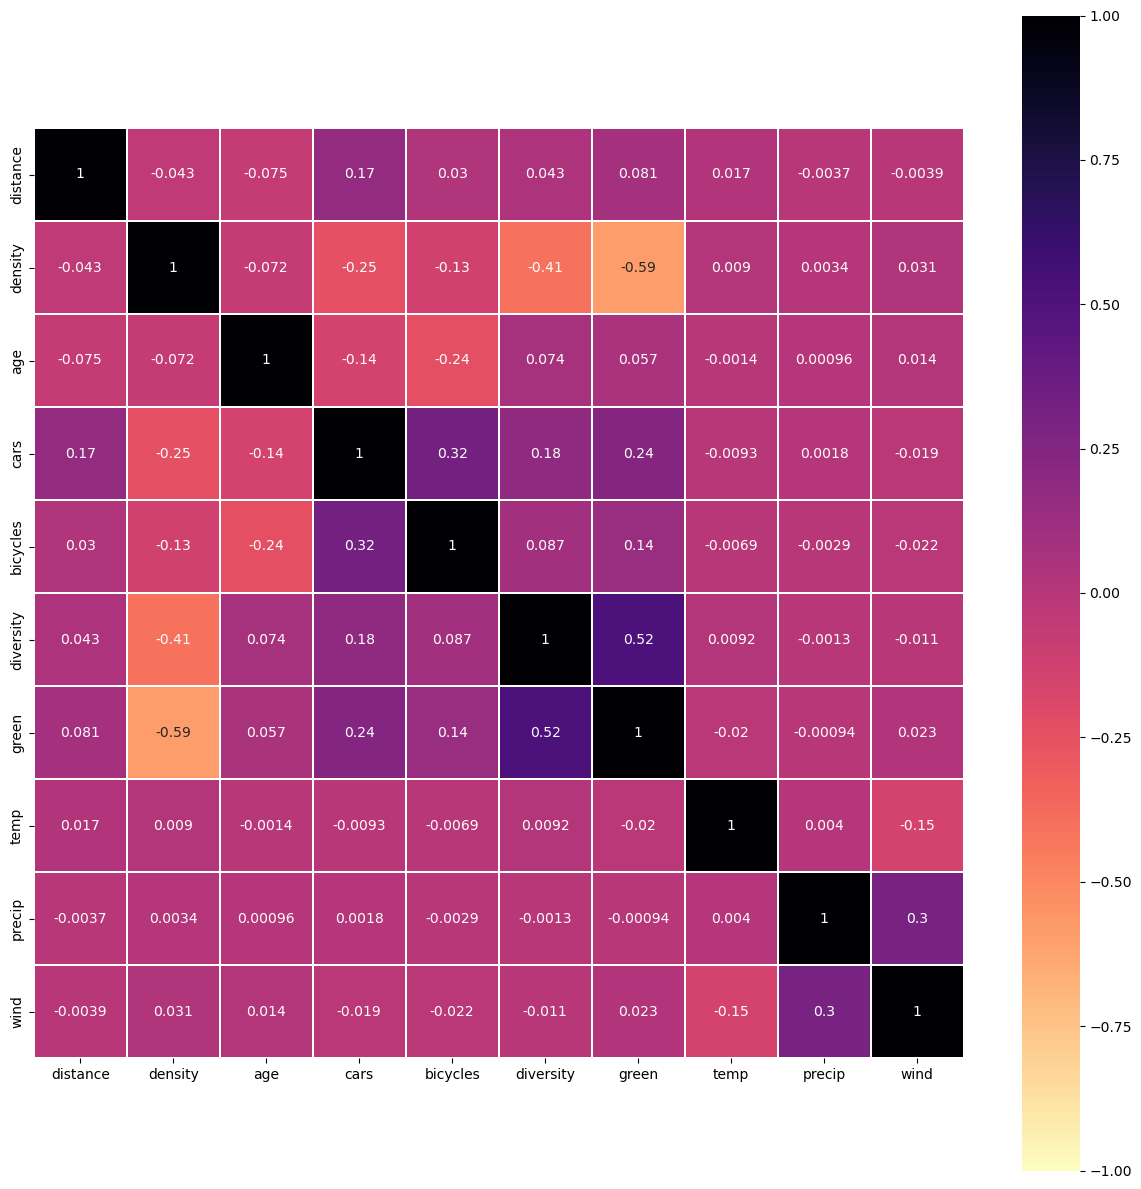

In [54]:
# create correlation matrix to understand the association between variables
import seaborn as sns
corr = X[numeric_data.columns].corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, center=0,cmap=plt.get_cmap('magma_r'),
            square=True, linewidths=.05, annot=True, vmin=-1, vmax=1,ax=ax) 
plt.show()

#### 🤨 TASK
What do you notice? Which variables are highly correlated with each other and which are not? 
Why do you think `density` and `green` have a strong negative correlation? 

In [20]:
# Highly correlated variables include density-green (negative), density-diversity (negative), age-bicycles (negative) diversity-green, precip-wind, cars-bicycle, cars-green
# The denser a part of the city is, the less proportion of green area it would have

As we learnt in the previous classes, there are many different methods to explore the data. `Seaborn` is a popular library to further interrogate the data. More information can be found [here](https://seaborn.pydata.org/).

#### Standardise data
We need to standardise the data (again!) to make them comparable and more stable for training. Remember the units also become less interpretable.

In [55]:
X[numeric_data.columns].head()

,distance,density,age,cars,bicycles,diversity,green,temp,precip,wind
0,0.693147,0.816510,84,0.000000,1,1.24604,26.881233,0.1,0.09531,1.386294
1,2.397895,0.816510,84,0.000000,1,1.24604,26.881233,0.1,0.09531,1.386294
2,1.386294,1.016187,27,0.693147,2,1.53959,36.045955,-3.4,0.04879,1.029619
3,1.386294,1.016187,27,0.693147,2,1.53959,36.045955,-3.4,0.04879,1.029619
4,4.135167,1.016187,27,0.693147,2,1.53959,36.045955,-3.4,0.04879,1.029619


In [56]:
# this line creates an instance of the Standard Scaler to transform the data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [57]:
# this fits and transforms the data
X[numeric_data.columns] = scaler.fit_transform(X[numeric_data.columns]) #we standardise all variables, including the log transformed ones

C:\Users\jihun\AppData\Local\Temp\ipykernel_27920\2308393538.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_data.columns] = scaler.fit_transform(X[numeric_data.columns]) #we standardise all variables, including the log transformed ones


In [58]:
X[numeric_data.columns].head()

,distance,density,age,cars,bicycles,diversity,green,temp,precip,wind
0,-0.970743,0.005842,2.280451,-2.328318,-1.217145,-1.072714,-1.265462,-1.746950,-0.641799,-0.497952
1,0.519275,0.005842,2.280451,-2.328318,-1.217145,-1.072714,-1.265462,-1.746950,-0.641799,-0.497952
2,-0.364904,0.423073,-1.296614,-0.336459,-0.700778,-0.477322,-0.852122,-2.209564,-0.695103,-1.496529
3,-0.364904,0.423073,-1.296614,-0.336459,-0.700778,-0.477322,-0.852122,-2.209564,-0.695103,-1.496529
4,2.037720,0.423073,-1.296614,-0.336459,-0.700778,-0.477322,-0.852122,-2.209564,-0.695103,-1.496529


let's then cast the categorical variables into numeric variables for analysis.

In [59]:
X=pd.concat([X,pd.get_dummies(X['ethnicity'])],axis=1)
X=pd.concat([X,pd.get_dummies(X['male'])],axis=1)
X=pd.concat([X,pd.get_dummies(X['education'])],axis=1)
X=pd.concat([X,pd.get_dummies(X['income'])],axis=1)
X=pd.concat([X,pd.get_dummies(X['license'])],axis=1)
X=pd.concat([X,pd.get_dummies(X['weekend'])],axis=1)

#The pd.concat() operation with pd.get_dummies() adds new columns to X (dummy variables) 
#and 'X.columns=' ensures that those columns have the desired labels

X.columns=['distance', 'density', 'age', 'male', 'ethnicity', 'education',
       'income', 'cars', 'license', 'bicycles', 'weekend', 'diversity',
       'green', 'temp', 'precip', 'wind', 'native_eth', 'nonwestern_eth', 'western_eth',
       'no_male', 'yes_male', 'higher_edu', 'lower_edu', 'middle_edu', '20to40_inc', 'less20_inc', 'more40_inc',
       'no_license', 'yes_license', 'no_weekend', 'yes_weekend']

#it is redundant to keep both 'no_license' and 'yes_license' etc. so we select only specific variables
X=X[['distance', 'density', 'age', 'cars', 'bicycles', 'diversity',
       'green', 'temp', 'precip', 'wind', 'native_eth', 'nonwestern_eth', 'western_eth',
       'yes_male', 'higher_edu', 'lower_edu', 'middle_edu','20to40_inc', 'less20_inc', 'more40_inc',
       'yes_license', 'yes_weekend']]

Do the same for the target variable (y)

In [60]:
from sklearn.preprocessing import LabelEncoder
Label = LabelEncoder() #easy labelling with LabelEncoder
y=pd.concat([y,pd.DataFrame(Label.fit_transform(y),columns=['labels'])],axis=1)
ylabels=y['labels']

C:\Users\jihun\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [61]:
print(y.value_counts())
print(ylabels)

mode_main  labels
car        1         127439
bike       0          56298
walk       3          37571
pt         2           9300
Name: count, dtype: int64
0         3
1         3
2         1
3         1
4         1
         ..
230603    0
230604    0
230605    1
230606    1
230607    1
Name: labels, Length: 230608, dtype: int32


### Splitting the dataset into training and test groups

As we mentioned in the last couple of classes, in machine learning applications, it is **important** to split the entire dataset at least two sets - the `_train` and `_test` sets to see how well it generalises - i.e., is it over-fitted to the dataset you made it using, such that it has little worth when used to predict outcomes on another dataset? In many cases, you might need to have three dataset namely `train/val/test` where the validation dataset in this case would be only used for the purposes of hyper-parameter tuning. 

In [62]:
#splits the datasets (both x- and y-variables) into the training and test sets
(X_train, X_test, y_train, y_test) = train_test_split(X, ylabels, train_size=0.7, random_state=1)

In [63]:
#creates a new logistic regression model
model = LogisticRegression()
#fits (/configures) this model using the training data
model.fit(X_train, y_train)

#then tries to make a prediction using the test dataset's x-variables
y_pred=model.predict(X_test)
y_pred[0:10]

array([1, 3, 1, 3, 1, 2, 3, 1, 1, 1])

#### 🤨 TASK
**Always sanity check** : do the results make sense? How do these predictions compare to the ground-truth? Plot the first 10 samples in y_test.

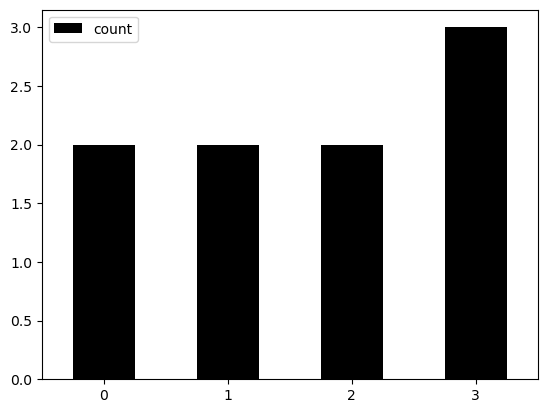

In [64]:
pd.DataFrame(y_test[1:10].value_counts(), index = [0, 1, 2, 3]).plot(kind='bar',color='black')
plt.xticks(rotation=0)
plt.show()

Remember that the logistic regression estimates **probabilities** (in this case, which travel mode an individual takes), then classifies them into the mode they most likely have taken. To have an understanding of how accurate our model was, we can, instead of asking the model to give us the final classifications (travel mode), return the probabilities that it calculated.

In [65]:
#predict probabilities of allocation of each categories
y_pred_prob=model.predict_proba(X_test)
pd.DataFrame(y_pred_prob,columns=[y.mode_main.unique()]).head(n=10)

,walk,car,pt,bike
0,0.289785,0.510444,0.003045,0.196726
1,0.386841,0.092283,0.010608,0.510267
2,0.037357,0.834254,0.127824,0.000566
3,0.204236,0.291914,0.000980,0.502870
4,0.198813,0.686258,0.006184,0.108745
5,0.212566,0.050989,0.659583,0.076861
6,0.286024,0.153208,0.000316,0.560452
7,0.133494,0.554550,0.309979,0.001977
8,0.124559,0.775631,0.048556,0.051254
9,0.218473,0.430843,0.002844,0.347840


### Reporting Results - Classificaton

Let's report the result with accuracy (the number of correctly predicted divided by its total).

In [66]:
#reports the prediction accuracy of the testset
print ('the out of sample test accuracy is : '+ str(round(accuracy_score(y_test, y_pred),3)))

the out of sample test accuracy is : 0.676


Let's now compare the results to the training set prediction. A significant difference between training and test accuracy (e.g., high training accuracy (below) but low test accuracy (above)) would indicate overfitting.

In [67]:
#reports the prediction accuracy of the trainset
y_pred_train=model.predict(X_train) 
print ('the in sample test accuracy is : '+ str(round(accuracy_score(y_train, y_pred_train),3)))

the in sample test accuracy is : 0.674


The results are really similar meaning the model is likely not to be overfitting. 

As a reminder, for more details of the model, we can use the ```classification_report``` function in ```sklearn```. The report shows some key metrics through which we can judge the accuracy of the logistic regression model we have created: **accuracy,precision, recall and f1-score**. The calculation of precision and recall statistics entails using measures such as the rates of true and false negatives/positives (by comparing the predicted and observed) while F1 score is a composite measure that takes into consideration both the former two. In general these measures should be reported specially when the data is imbalanced (as here). 

More formally;

$Precision = TP/(TP+FP)$

$Recall = TP/(TP+FN)$

$F1 = 2(Precision*Recall)/(Precision+Recall)$

Read more about these statistics [here](https://muthu.co/understanding-the-classification-report-in-sklearn/) or look at documentation [here](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report). 

```classification_report``` provides the results for each category as well as the macro averages (i.e. averages across the categories).


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.44      0.48     16839
           1       0.74      0.87      0.80     38380
           2       0.60      0.23      0.33      2741
           3       0.56      0.47      0.51     11223

    accuracy                           0.68     69183
   macro avg       0.61      0.50      0.53     69183
weighted avg       0.66      0.68      0.66     69183



### Confusion Matrix
Let's also produce the <b>confusion matrix</b>, which shows exactly what proportion of each travel choice was rightly and wrongly classified. The x- and y-axes of the plot below shows, respectively, the travel mode that was predicted (```Predicted label```) vs the ground truth (```True label```) is. Those along the diagonals are rightly predicted and those along the off diagonals are wrongly predicted or confused.

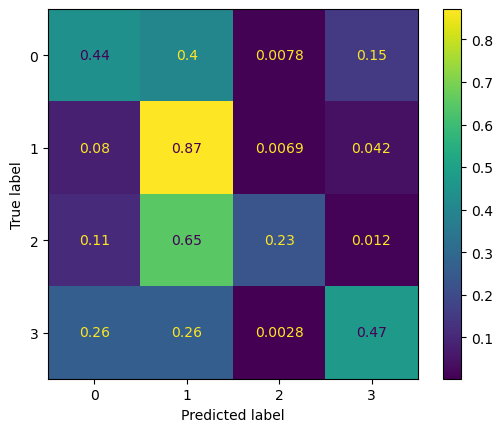

In [69]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true')

#### 🤨 TASK
what do you notice? which travel mode is making the most errors? why do you think is the case here?

In [ ]:
# Public Transport is making the most errors, likely due to having the lowest number of data points (9300) compared to others e.g. car (127439)

### Model comparison - Ensemble Learners
Comparing models is a critical aspect of machine learning. What makes using the syntax of `sklearn` so convenient is that you only need to make a few adjustments to run a different model ie. `model.fit`. In this case we will learn about `Decision Tree` Classifiers and `Random Forest` Classifiers.

Let's take this opportunity to try out a different model as an example. In this case we will use the `RandomForestClassifier`. `RF` is an `ensemble learning` method which uses multiple simple predictors in order to make a better prediction. The hypothesis is that multipler learners will generate better results than a single learner. For tabular data, `ensemble learning` algorithms are even outperforming deep neural networks such as transformers (Shwartz-Ziv et al 2022).

In greater detail, **Random Forest Regressors/ Classifiers** (Breiman 2001), is based on fitting a multitude of [Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)[1], each on samples drawn with replacement (i.e., bootstrap sample) from the training set. The outcomes from multiple simple models across multiple observations are often i. the one that is most often predicted (majority voting) across multiple trees for classification or ii. the mean or average prediction across multiple trees for regression.

And lastly, another ensemble learning method is **Gradient Boosting Regressors/ Classifiers** (Friedman 2001), which combines many weak "learners" into a single strong learner in an iterative fashion where each regressor tries to improve the previous model. The one implemented in `sklearn` is called `GradientBoostingClassifier`. 

There are many more machine learning algorithms and this is only the tip of the ice-berg. We will explore one in today's exericise. The aim here isn't to describe every one of these but rather to show the spectrum of methods where the student can then go and explore.  

<img src="Random Forest Diagram (wikipedia-commons).png" alt="drawing" width="620" align='center' >
<center><b>Fig 1. Random Forest Diagram (wikipedia-commons).</b></center>


[1] It is important to give a simple description of Decision Tree here. DT is another supervised learning algorithm that learns simple decision rules inferred from the data features. As implied by the 'tree' in its name, the model can pass each observation that goes through it via multiple branches (or routes) of decisions to help it derive a final outcome for that given observation). [For a premier of Decision Trees in plain English, this](https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6) is a good link to have a brief read at! 

Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32. 

Friedman, J.(2001). Greedy Function Approximation: A Gradient Boosting Machine, The Annals of Statistics, 29(5)

Shwartz-Ziv, R., & Armon, A. (2022). Tabular data: Deep learning is not all you need. Information Fusion, 81, 84-90.


In [70]:
from sklearn.ensemble import RandomForestClassifier
model_forest =  RandomForestClassifier() 
model_forest.fit(X_train, y_train)
y_pred=model_forest.predict(X_test)
print ('the out of sample test accuracy for a RandomForestClassifier is : '+ str(round(accuracy_score(y_test, y_pred),3)))

the out of sample test accuracy for a RandomForestClassifier is : 0.823


You can see that the calculation takes longer, but the accuracy is higher.

## Hyper-parameter tuning and Cross Validation

Many models in machine learning have hyper-parameters which are parameters that are not directly learnt within the estimators but instead needs to be tuned. Typical hyper-parameters include `max_depth`(The maximum depth of the tree) and `n_estimators`(The number of trees in the forest) for [RandomForestClassifiers](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). Let's set randomly here `max_depth`=20. Remember to read the documentation of the model to know what each of these hyper-parameters mean.

In [71]:
from sklearn.ensemble import RandomForestClassifier
model_forest2 =  RandomForestClassifier(max_depth=20) 
model_forest2.fit(X_train, y_train)
y_pred=model_forest2.predict(X_test)
print ('the out of sample test accuracy for a RandomForestClassifier is : '+ str(round(accuracy_score(y_test, y_pred),3)))

the out of sample test accuracy for a RandomForestClassifier is : 0.79


Are the results better or worse? how do we know whether these parameters yield the best results?

### KFold Cross Validation

As mentioned previously, when training a machine learning model that includes hyper-parameters. It is important to split the training data into a validation set. However, partitioning the training data into a train and validation set drastically reduce the number of samples which can be used for learning the model, while the results can depend on the particular validation set. A useful and common resampling procedure is  k-fold Cross validation, the training set is split into k smaller folds, where a model is trained on each folds of the training data and validated on the remaining parts of the data. This is repeated until all folds are exhausted. The results are calculated on an out-of-sample testset.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" alt="drawing" width="420" align="left">


### GridSearchCV

It is possible and recommended to search the hyper-parameter space for the best cross validation score using cross validation. A simple way to do this is called the `GridSearchCV` which exhaustively generates candidates from a grid of parameter values specified . To reduce the number of possible models to test, we restrict the search where 
`max_depth`:[10,40] and `n_estimators`:[100]. 
You can read more about it from [here](https://scikit-learn.org/stable/modules/grid_search.html)
and [here](https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d) for an overview of what the main parameters are, and how you could tune them.  <br/>

**The process may take a while or doesn't work on your machine if doesn't have enough disk space. You are welcome to use [Google Colab online](https://colab.research.google.com/).**

In [72]:
from sklearn.model_selection import GridSearchCV# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10, 40],
    'n_estimators': [100]#, 200, 300]# restricted the grid search to reduce compute time 
}
# Create a based model
model = RandomForestClassifier()# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3 # number of folds for cross validation
                           , n_jobs = -1 # use all processors
                            , verbose = 2 # what to display
                          )

In [73]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 40], 'n_estimators': [100]},
             verbose=2)

Please note, `GridSearchCV` is applied only on the training set here when you create three folds. Remember you can also just simply split the training set into a training and validation set.

In [81]:
model = grid_search.best_estimator_
y_pred=model.predict(X_test)
print ('the out of sample test accuracy for a RandomForestClassifier is : '+ str(round(accuracy_score(y_test, y_pred),3)))

the out of sample test accuracy for a RandomForestClassifier is : 0.824


#### 🤨 TASK
Try grid searching for more hyper-parameters. 

In [ ]:
???

The classification accuracy will likely have improved and even if it hasn't improved, we can say that the results are robust to different settings of hyper-parameters. 
You might have also noticed, due to this process of hyper-parameter tuning, it takes a lot longer to process.

### Feature Importance

Due to the black-box nature of most machine learning algorithms, there are no easy way to interpret similar coefficients. However, there are **interpretable ML** approaches to measure feature importance for methods like `Random Forest (RF)`. A **model-agnostic** way to interpret a machine learning model such as `RF` is [permutation importance](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance).

**The process may take a while or doesn't work on your machine if it doesn't have enough disk space. You are welcome to use [Google Colab online](https://colab.research.google.com/).**

In [ ]:
from sklearn.inspection import permutation_importance
# if it doesn't work,you meight need to change n_jobs
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
coef = pd.DataFrame(result.importances_mean,index=X.columns,columns=['importance'])
coef = coef.reset_index()
coef.columns=['features','importance']
coef['importance']=np.abs(coef['importance'])
coef=coef.sort_values(by='importance',ascending=False)
plt.figure(figsize=(6,6))

sns.barplot(x='importance',y='features',data=coef,)
plt.show()

Lab Exercise 7.1 XGBoost 
-------------------------------

For this week's exercise, we will have the student explore a popular **gradient boosting** [1] algorithm implementation called **XGBoost** (Extreme Gradient Boosting), which is a type of ensemble gradient boosting algorithm where weak learners (simple models) are built sequentially to correct the errors made by the preceding models. In simple terms, gradient boosting focuses on reducing the residual errors iteratively. `sklearn` has an implementation of the algorithm called `gradientboosting` but the `xgboost` version is much quicker. 

You can find the reference for the algorithm with this link [2] and the python library here [3]. The library can be easily installed with pip or conda. 

`!pip install xgboost`

[1] Friedman, J.(2001). Greedy Function Approximation: A Gradient Boosting Machine, The Annals of Statistics, 29(5)

[2] Chen, T., & Guestrin, C. (2016). Xgboost: A scalable tree boosting system. In Proceedings of the 22nd acm sigkdd international conference on knowledge discovery and data mining (pp. 785-794).

[3] xgboost. https://xgboost.readthedocs.io/en/stable/#



For this exercise, please run a similar **predictions** using the `XGBoost` library. Remember this is a multi-class classification problem and not a regression problem so please use the appropriate method. Remember to tune the hyper-parameters of the classifier. For `xgboost` an important parameter to tune is `eta/learning rate` which shrinks the contribution of each tree to help prevent overfitting and improve generalization. 
[link](https://xgboost.readthedocs.io/en/stable/parameter.html). 

#### 🤨 TASK

It might be a good time now to read the following article and try to replicate some of the experiments of the paper.

[1] Hagenauera,J.& Helbich,M. (2017) Comparative study of machine learning classifiers for modelling travel mode choice. Expert Systems with Applications (78)


In [106]:
# import xgboost
import xgboost as xgb

# prepare the data for XGBoost using the DMatrix class, which optimises memory usage and computation
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test, label = y_test)

In [107]:
# set up parameters for XGBoost model training
params = {
    'max_depth': 3, # maximum depth of a tree to control model complexity and prevent overfitting
    'eta': 0.1, # learning rate (step size); try adjusting this value for better convergence
    'objective': 'multi:softmax', #specifies the loss function for multi-class classsification
    'num_class': 4, # number of unique classes in the target variable
}

num_boost_round = 20 # number of boosting rounds (iterations); higher values can improve model performance but may increase training time

In [108]:
# train the model using the training data and defined parameters
bst = xgb.train(params, dtrain, num_boost_round)

In [109]:
# make predictions on the test est using the trained model
preds = bst.predict(dtest)

In [111]:
# evaluate the model's accuracy using the actual labels and prediction
accuracy = accuracy_score(y_test, preds)
print("Accuracy: {:.2%}".format(accuracy)) # print accuracy as a percentage with 2 decimal places 

Accuracy: 67.69%
